# 데이터 전처리

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/2-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 넘파이로 데이터 준비하기

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np

In [ ]:
np.column_stack(([1,2,3], [4,5,6])) # 전달받은 리스트를 일렬로 세운 다음 연결시켜준다..(리스트를 튜플형태로 묶어주어야함)

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight)) # [길이,무게]

In [ ]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
print(np.ones(5)) # 1을 채운 배열을 만들어줌

[1. 1. 1. 1. 1.]


In [ ]:
# np.concatenate() 첫번째 차원을 따라 배열을 연결
fish_target = np.concatenate((np.ones(35), np.zeros(14))) # 1을 35개채운 리스트, 0을 14개채운 리스트

In [ ]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 사이킷런 train_test_split 임포트
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)
# fish_data를 train_input, test_input 훈련세트, 테스트세트 입력
# fish_target을 train_target, test_target 훈련세트, 테스트세트 타깃

In [ ]:
print(train_input.shape, test_input.shape) # 훈련세트 샘플 36개 테스트세트 샘플 13개 (특성 2개)

(36, 2) (13, 2)


In [ ]:
print(train_target.shape, test_target.shape) # 훈련타깃 샘플 36개 테스트타깃 샘플 13개 

(36,) (13,)


In [ ]:
print(test_target) # 샘플 데이터 테스트타깃 13개

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42) # stratify  매개변수에 타깃데이터를 전다랗면 클래스 비율에 맞게 데이터를 나눔

In [ ]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 수상한 도미 한마리

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # k-최근접 이웃(거리를 계산) - 현재 내 위치에서 다수가 근접하는 값을 찾음 

kn = KNeighborsClassifier()
kn.fit(train_input, train_target) # 훈련 데이터로 모델 훈련
kn.score(test_input, test_target) # 테스트 데이터로 모델 평가

1.0

In [ ]:
print(kn.predict([[25, 150]])) # 도미(1) 빙어(0) 도미데이터인데 빙어로 인식

[0.]


In [ ]:
import matplotlib.pyplot as plt

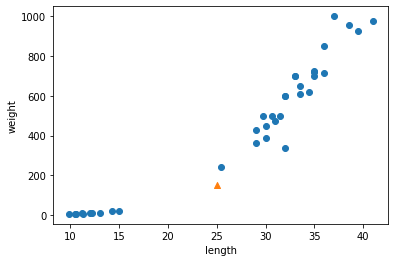

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])  # x축= 훈련데이터 입력
plt.scatter(25, 150, marker='^') # 산점도로 확인
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
distances, indexes = kn.kneighbors([[25, 150]]) # kneighbors는 가까운 이웃을 찾아주는 메서드(기본값은 5이므로 5개 이웃반환)

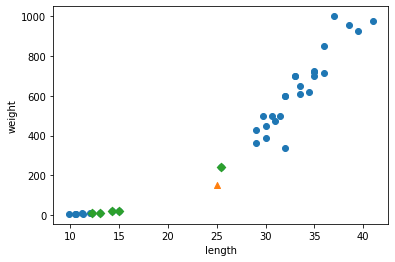

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1]) # 원본 데이터
plt.scatter(25, 150, marker='^') # 비교대상 지정
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') # 가까운 샘플이 초록색 다이아 몬드로 표시
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(train_input[indexes]) # 가까운 샘플 데이터 입력 5개

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [ ]:
print(train_target[indexes]) # 훈련 데이터 타깃(정답) 5개

[[1. 0. 0. 0. 0.]]


In [ ]:
print(distances) # 거리

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


## 기준을 맞춰라

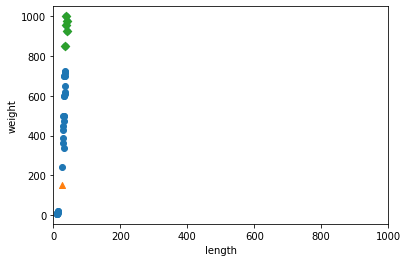

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000)) # x축을 y축 범위에 맞게 지정 (0~1000) <<<<<< 이런 작업을 데이터 전처리라고 부른다.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 분산은 데이터에서 평균을 뺀 값으르 모두 제곱한 다음 평균을 내어 구한다.  
* 표준편차는 분산의 제곱근으로 데이터가 분산된 정도를 나타냄. 
* 표준점수는 각 데이터가 원점에서 몇 표준편차만큼 떨어져 잇는지를 나타내는 값

In [ ]:
mean = np.mean(train_input, axis=0) # np.mean() 평균을 계산
std = np.std(train_input, axis=0) # npm.std() 표준편차를 계산
# axis=0 각 특성별 계산, axis=1 반대

In [ ]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
train_scaled = (train_input - mean) / std # 표준점수 계산(브로드캐스팅으로 쉽게 계산됨)
print(train_scaled)

## 전처리 데이터로 모델 훈련하기

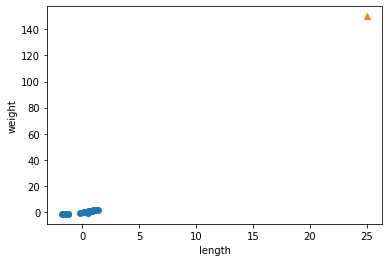

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1]) #전체데이터(x축=길이, y축=무게)
plt.scatter(25, 150, marker='^')  # 훈련세트를 평균으로 빼고 표준편차로 나누었기 때문에 값의 범위가 크게 달라짐 
                                  # 따라서 마커도 new 로 변환
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
new = ([25, 150] - mean) / std # 샘플 마커를 동일한 비율로 변환

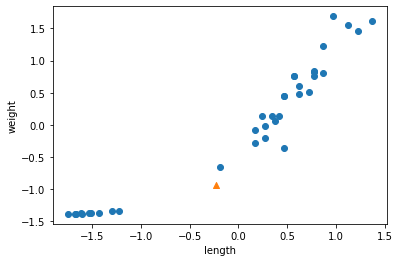

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1]) # 
plt.scatter(new[0], new[1], marker='^') # 
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # x축과 y축의 범위가 -1.5~1.5사이로 바뀜

In [ ]:
kn.fit(train_scaled, train_target) # 데이터셋으로 훈련

KNeighborsClassifier()

In [ ]:
test_scaled = (test_input - mean) / std # 테스트세트도 스케일 변환

In [ ]:
kn.score(test_scaled, test_target) # 테스트세트의 샘플 분류 완료

1.0

In [ ]:
print(kn.predict([new])) # 도미(1)로 예측 성공 -- 빙어(0)

[1.]


In [ ]:
distances, indexes = kn.kneighbors([new]) # kneighbors() 함수로 최근접 이웃을 구하기(기본값 5개)

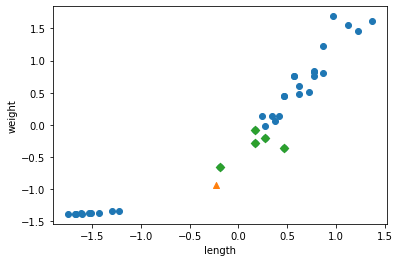

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1]) # 훈련데이터
plt.scatter(new[0], new[1], marker='^') #기준점
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D') # 이웃값
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 데이터 전처리: 머신러닝 모델에 훈련 데이터를 주입하기 전에 가공하는 단계
* 표준점수: 훈련세트의 스케일을 바꾸는 대표적인 방법, 표준점수 = 특성의 평균을 빼고 표준편차로 나눠준다
* 브로드캐스팅: 크기가 다른 넘파이 배열에서 자동으로 사칙 연산을 모든 행이나 열로 확장해주는 기능
* train_test_split(): 훈련 데이터를 훈련 세트와 테스트세트로 나누는 함수
  1. test_size 매개변수에서 비율을 지정할수 있고 기본값은 25%
  2. shhuffle 매개변수로 훈련 세트와 테스트 세트로 나누기 전에 무작위로 섞을지 결정
* kneighbors(): k-최근접 이웃 객체의 메서드, n_neighbors 매개변수로 개수 지정 가능


